# Classificação de músicas do Spotify


# Decision tree

Árvores de decisão são modelos estatísticos que utilizam um treinamento supervisionado para a classificação e previsão de dados. Uma árvore de decisão é utilizada para representar visualmente e explicitamente as decisões e a tomada de decisão. Apesar de ser amplamente utilizada em mineração de dados com algumas variações pode e é amplamente utilizada em aprendizado de máquina.

### Representação de uma árvore de decisão:

Uma arvore de decisão como representada na figura abaixo é representada por nós e ramos, onde cada nó representa um atributo a ser testado e cada ramo descendente representa um possível valor para tal atributo.



![image.png](https://www.researchgate.net/profile/Sergio_Ribeiro11/publication/320042879/figure/fig8/AS:543028939063296@1506479596137/Figura-14-Exemplo-de-arvore-de-decisao-para-sair-ou-nao-de-um-determinado-local.png)


+ Dataset: https://www.kaggle.com/geomack/spotifyclassification
+ Info sobre as colunas: https://developer.spotify.com/web-api/get-audio-features/

+ https://graphviz.gitlab.io/download/
+ conda install -c anaconda graphviz 
+ conda install -c conda-forge pydotplus 


In [10]:
import graphviz
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import pydotplus

import io
from scipy import misc

from sklearn import tree # pack age tree 
from sklearn.metrics import accuracy_score # medir % acerto
from sklearn.model_selection import train_test_split # cortar dataset
from sklearn.tree import DecisionTreeClassifier, export_graphviz # arvore de decixao classificacao e graphviz para visualizar

*** Verificando os dados *** 

In [11]:
df = pd.read_csv('data.csv')
df.head(3)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future


In [12]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Divisão treino e teste 
### Divisão 70 - 30

In [13]:
train, test = train_test_split(df, test_size=round(len(df)*0.3))

In [14]:
print('Tamanho do set de treino: {},\nTamanho teste: {}'.format(len(train), len(test) ))

Tamanho do set de treino: 1412,
Tamanho teste: 605


In [15]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


O objetivo é dividir em grupos homogênioss com valor de 1 ou 0, dando uma serie de "caminhos" para determinar se o usuário gostou ou não da música.

In [16]:
# falar de overfitting comparando pagode funk e etc
# quanto maior o valor menor a arvore 
tree = DecisionTreeClassifier(min_samples_split=100)

In [17]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness", "duration_ms"]

In [19]:
x_train = train[features]
y_train = train['target']

x_test = test[features]
y_test = test['target']

In [20]:
dct = tree.fit(x_train, y_train) # scikit fez uma decision tree

In [21]:
# visualizando

def showTree(tree, features, path):
    file=io.StringIO()
    export_graphviz(tree, out_file=file, feature_names=features)
    pydotplus.graph_from_dot_data(file.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

/home/gabs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


CPU times: user 834 ms, sys: 31.7 ms, total: 865 ms
Wall time: 885 ms


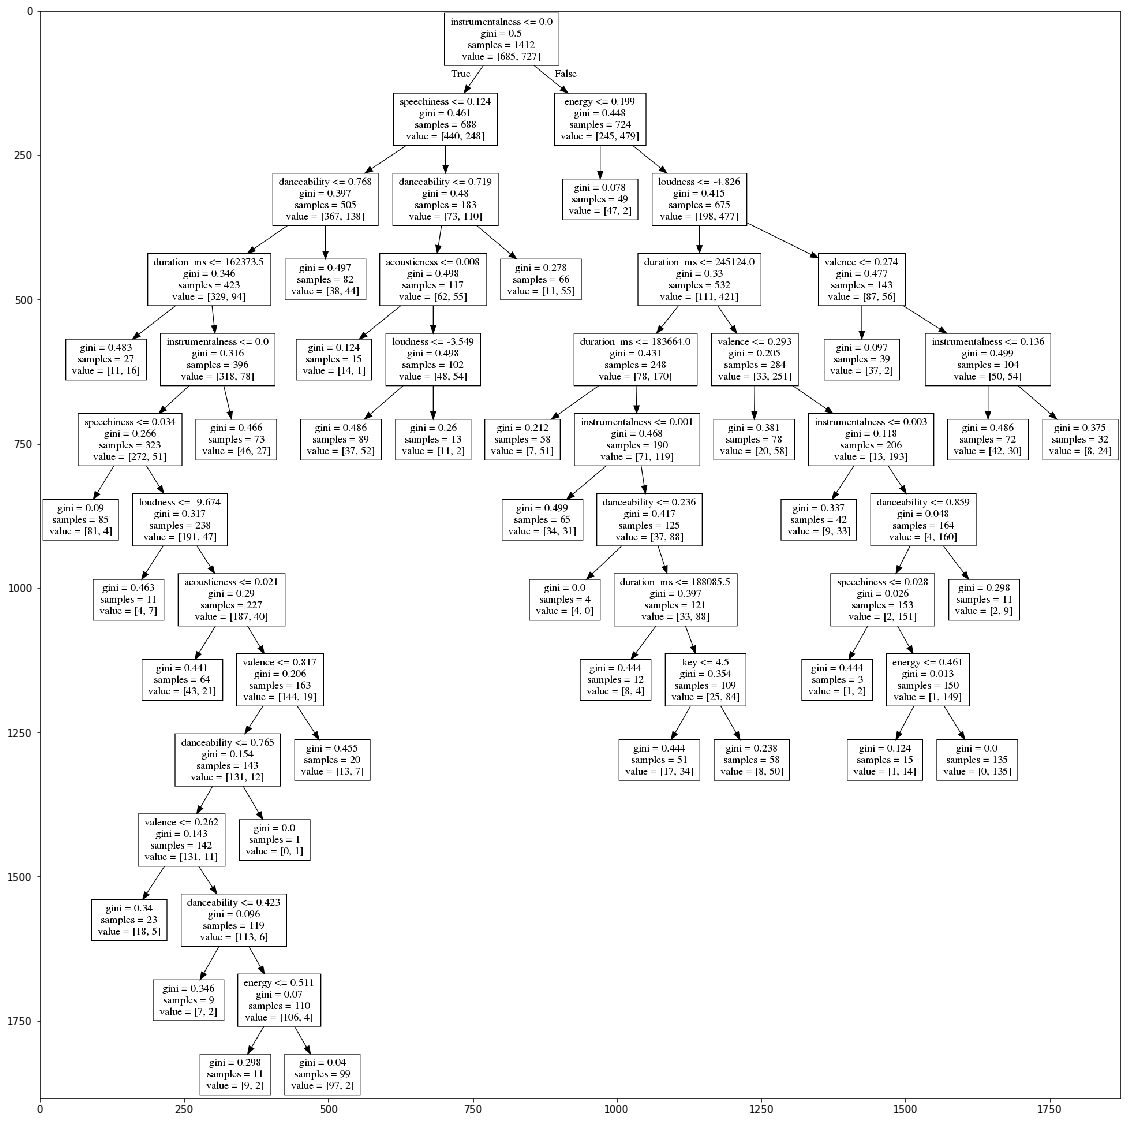

In [26]:
%%time
showTree(dct, features, 'minhaprimeiradct.png')

In [27]:
y_pred = tree.predict(x_test)

In [28]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [29]:
score = accuracy_score(y_test, y_pred)*100

In [30]:
print('Score = {}'.format(score))

Score = 69.0909090909091


# Overfitting e Underfitting


*** Underfitting:*** Quando você treina seu algoritmo e testa ele no próprio conjunto de treino e percebe que ele ainda tem uma tacha de erro considerável e então testa ele no conjunto de teste e percebe que a taxa de erro é semelhante mas ainda alta.

Isso quer dizer que estamos diante de um caso de Underfitting o algoritmo tem um alto Bias e ainda podemos melhorar sua classificação, para isso deveremos mexer em alguns parâmetros do algoritmo.

Claro que em nem todos os casos ira ocorrer dessa forma depende da natureza do algoritmo.

*** Overfitting: *** Agora você treinou seu algoritmo e depois disso resolveu aplicá-lo em seu conjunto de treino e fica feliz quando percebe que ele teve uma taxa de erro de 00,35% por exemplo. Mas quando aplica no conjunto de teste percebe que ele tem um desempenho horrível.





# Random Forest Classifier


Florestas aleatórias ou florestas de decisão aleatórias são um método de aprendizado conjunto para classificação, regressão e outras tarefas que operam construindo uma multiplicidade de árvores de decisão no momento do treinamento e gerando a classe que é o modo das classes (classificação) ou predição de média ) das árvores individuais. Florestas de decisão aleatórias corrigem o hábito das árvores de decisão de overfitting em seu conjunto de treinamento.


![img.png](https://www.mdpi.com/ijgi/ijgi-06-00245/article_deploy/html/images/ijgi-06-00245-g003.png)

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
f_ypred = clf.predict(x_test)
score = accuracy_score(y_test, f_ypred) * 100
print('Score da decision tree: {}'.format(score))

Score da decision tree: 74.54545454545455


# DESAFIO

https://www.kaggle.com/c/wine-quality-decision-tree